Figure parameters

In [95]:
# Generalized variables
textwidth_cm = 16.50764  # Text width in cm
aspect_ratio = 0.618     # Aspect ratio (height/width) using the golden ratio

# Font sizes
label_fontsize = 10
legend_fontsize = 10
tick_fontsize = 8
colorbar_label_fontsize = 10
colorbar_tick_fontsize = 8
offset_text_fontsize = 10
tick_fontsize = 8
errorbar_capsize = 5

# Convert text width from cm to inches
textwidth_in = textwidth_cm / 2.54

# Calculate figure size based on text width and aspect ratio
fig_width = textwidth_in
fig_height = textwidth_in * aspect_ratio

In [96]:
import numpy as np
import xtrack as xt
import xobjects as xo
import xpart as xp
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy import constants 
from matplotlib.patches import Patch
from matplotlib.ticker import ScalarFormatter
from ipywidgets import interact, IntSlider

#### PLOT THE DATA #######
textwidth_cm = 16.50764  # Text width in cm
aspect_ratio = 0.618     # Aspect ratio (height/width) using the golden ratio

# Font sizes
label_fontsize = 10
legend_fontsize = 10
tick_fontsize = 8
colorbar_label_fontsize = 10
colorbar_tick_fontsize = 8
offset_text_fontsize = 8

# Convert text width from cm to inches
textwidth_in = textwidth_cm / 2.54

# Calculate figure size based on text width and aspect ratio
fig_width = textwidth_in
fig_height = textwidth_in * aspect_ratio

In [97]:
from ion_properties import lead,xenon,calcium


In [98]:
# context = xo.ContextCpu(omp_num_threads=4)
context = xo.ContextCpu()

line = xt.Line.from_json('sps.json')
particle_ref=line.particle_ref
line.build_tracker()

clight=constants.speed_of_light
circumference=line.get_length()

Loading line from dict:   0%|          | 0/38786 [00:00<?, ?it/s]

Done loading line from dict.           
Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.


Loop over both sig_delta and emittance

In [99]:
# # # Load the data from the saved .npz file
# loaded_data = np.load('../linear_lattice/results/cooling_rates.npz')
# transverse_growth_rate_list = loaded_data['transverse_growth_rate_list']
# longitudinal_growth_rate=loaded_data['longitudinal_growth_rate']

# loaded_data = np.load('../linear_lattice/results/optimal_laser_x/{ion_loop.name}.npz')
# transverse_growth_rate_list = loaded_data['transverse_growth_rate_list']
# longitudinal_growth_rate=loaded_data['longitudinal_growth_rate']



lead zoom in contour plot

In [100]:
# import numpy as np
# import matplotlib.pyplot as plt
# from tqdm import tqdm

# for i, ion_loop in tqdm(enumerate([lead])):
#     data = np.load(f'IBS_results_bunched/{ion_loop.name}.npz')
#     growth_rates_2d_x = data['growth_rates_2d_x']
#     growth_rates_2d_y = data['growth_rates_2d_y']
#     growth_rates_2d_z = data['growth_rates_2d_z']
#     sig_delta_list = data['sig_delta_list']
#     n_emitt_list = data['n_emitt_list']
#     total_intensity = data['total_intensity']

#     plt.figure(figsize=(12, 8))
#     plt.rcParams.update({'font.size': 25})

#     # Plot the contour plot
#     half_height = len(sig_delta_list) // 100
#     half_width = len(n_emitt_list) // 100
#     contour = plt.contourf(n_emitt_list[half_width:], sig_delta_list[half_height:], growth_rates_2d_x[half_height:, half_width:], cmap='viridis')
    
#     cbar = plt.colorbar(contour)
#     cbar.set_label('growth_rates_2d_x', fontsize=20)

#     plt.xlabel('geometrical emittance $\epsilon_x [\mu m]$', fontsize=20)
#     plt.ylabel('RMS dp/p', fontsize=20)
#     plt.title(f'Cooler growth rates: ({ion_loop.name}): {transverse_growth_rate_list[i]:.2f}')
#     plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
#     plt.tight_layout()

#     plt.show()


xenon growth rates

0it [00:00, ?it/s]

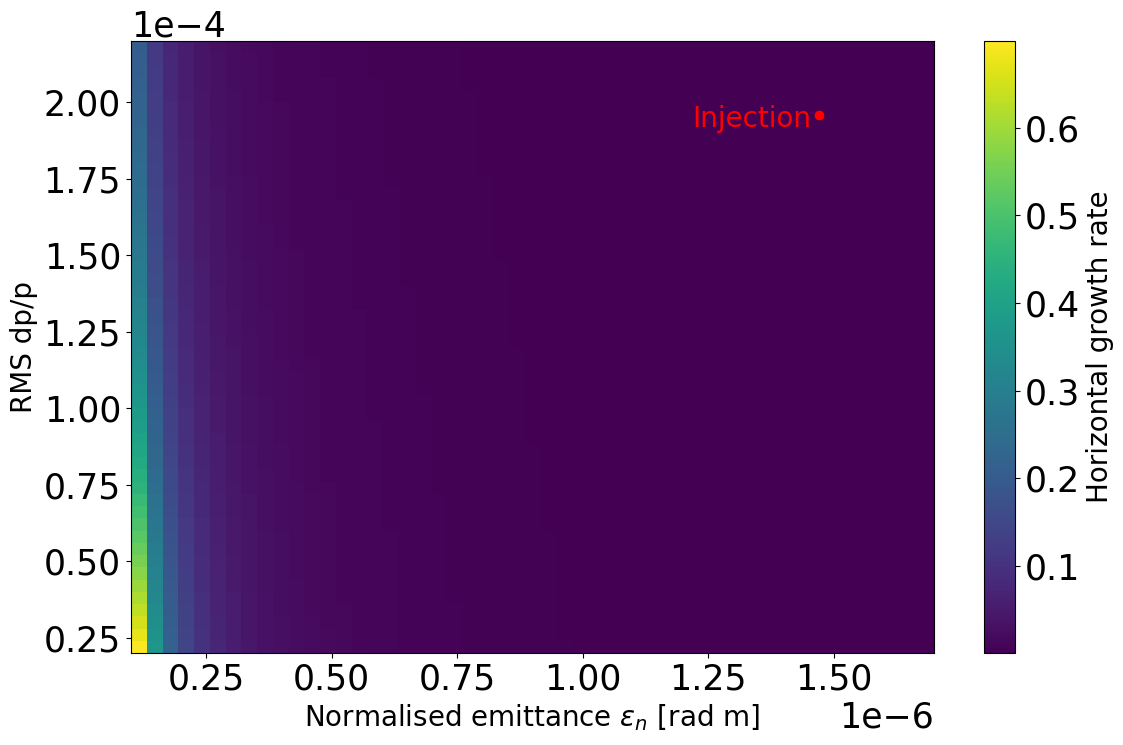

1it [00:00,  5.36it/s]


In [101]:
injection_nemitt = 1.5*1e-6 # m*rad (normalized emittance)
injection_dp_p = 2e-4

for i,ion_loop in tqdm(enumerate([lead])):

    data = np.load(f'../results/IBS_bunched/{ion_loop.name}.npz')

    growth_rates_2d_x = data['growth_rates_2d_x']
    growth_rates_2d_y = data['growth_rates_2d_y']
    growth_rates_2d_z = 0.5*data['growth_rates_2d_z']
    #max_growth_rate=np.maximum(growth_rates_2d_x,growth_rates_2d_y,growth_rates_2d_z)
    # max_growth_rate = np.maximum.reduce([growth_rates_2d_x, growth_rates_2d_y, growth_rates_2d_z])
    # max_growth_rate=growth_rates_2d_x
    sig_delta_list = data['sig_delta_list']
    n_emitt_list = data['n_emitt_list']
    total_intensity = data['total_intensity']

    plt.figure(figsize=(12, 8))
    plt.rcParams.update({'font.size': 25})

    # Plot the heatmap
    plt.imshow(growth_rates_2d_x, extent=[n_emitt_list.min(), n_emitt_list.max(), sig_delta_list[0], sig_delta_list[-1]],
               aspect='auto', origin='lower', cmap='viridis',norm=None)
       
    cbar = plt.colorbar()
    cbar.set_label('Horizontal growth rate', fontsize=20)

    # Add injection point
    plt.scatter(0.98*injection_nemitt, 0.98*injection_dp_p, color='red', label='Injection Point')
    plt.text(0.97*injection_nemitt, 0.96*injection_dp_p, 'Injection', color='red', fontsize=20, ha='right')

    #contour = plt.contour(geo_epsx_list, sig_delta_list, growth_rates_2d_x, levels=[threshold], colors='red', linewidths=2)
    plt.xlabel('Normalised emittance $\\epsilon_n$ [rad m]', fontsize=20)
    plt.ylabel('RMS dp/p', fontsize=20)
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
    plt.tight_layout()
    # plt.savefig('Lead_cooling_IBS_regime.png', dpi=300)
    plt.show()


longitudinal

0it [00:00, ?it/s]

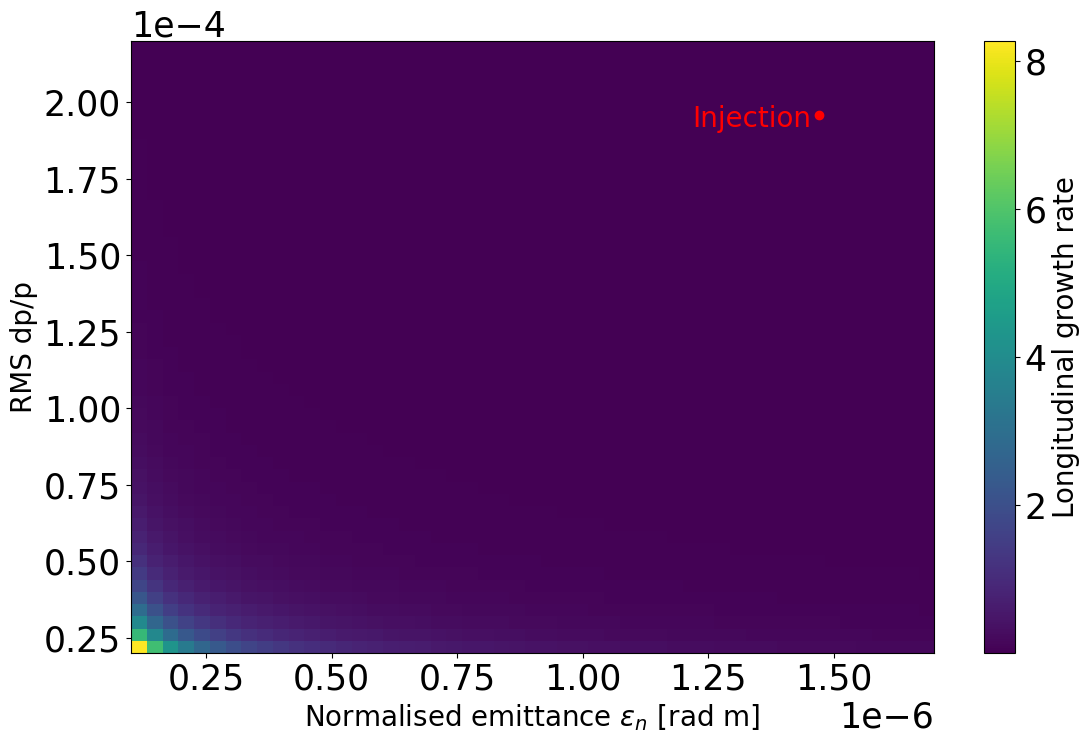

1it [00:00,  5.55it/s]


In [102]:
injection_nemitt = 1.5*1e-6 # m*rad (normalized emittance)
injection_dp_p = 2e-4

for i,ion_loop in tqdm(enumerate([lead])):

    data = np.load(f'../results/IBS_bunched/{ion_loop.name}.npz')

    growth_rates_2d_x = data['growth_rates_2d_x']
    growth_rates_2d_y = data['growth_rates_2d_y']
    growth_rates_2d_z = 0.5*data['growth_rates_2d_z']
    #max_growth_rate=np.maximum(growth_rates_2d_x,growth_rates_2d_y,growth_rates_2d_z)
    # max_growth_rate = np.maximum.reduce([growth_rates_2d_x, growth_rates_2d_y, growth_rates_2d_z])
    # max_growth_rate=growth_rates_2d_x
    sig_delta_list = data['sig_delta_list']
    n_emitt_list = data['n_emitt_list']
    total_intensity = data['total_intensity']

    plt.figure(figsize=(12, 8))
    plt.rcParams.update({'font.size': 25})

    # Plot the heatmap
    plt.imshow(growth_rates_2d_z, extent=[n_emitt_list.min(), n_emitt_list.max(), sig_delta_list[0], sig_delta_list[-1]],
               aspect='auto', origin='lower', cmap='viridis',norm=None)
       
    cbar = plt.colorbar()
    cbar.set_label('Longitudinal growth rate', fontsize=20)

    # Add injection point
    plt.scatter(0.98*injection_nemitt, 0.98*injection_dp_p, color='red', label='Injection Point')
    plt.text(0.97*injection_nemitt, 0.96*injection_dp_p, 'Injection', color='red', fontsize=20, ha='right')

    #contour = plt.contour(geo_epsx_list, sig_delta_list, growth_rates_2d_x, levels=[threshold], colors='red', linewidths=2)
    plt.xlabel('Normalised emittance $\\epsilon_n$ [rad m]', fontsize=20)
    plt.ylabel('RMS dp/p', fontsize=20)
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
    plt.tight_layout()
    # plt.savefig('Lead_cooling_IBS_regime.png', dpi=300)
    plt.show()


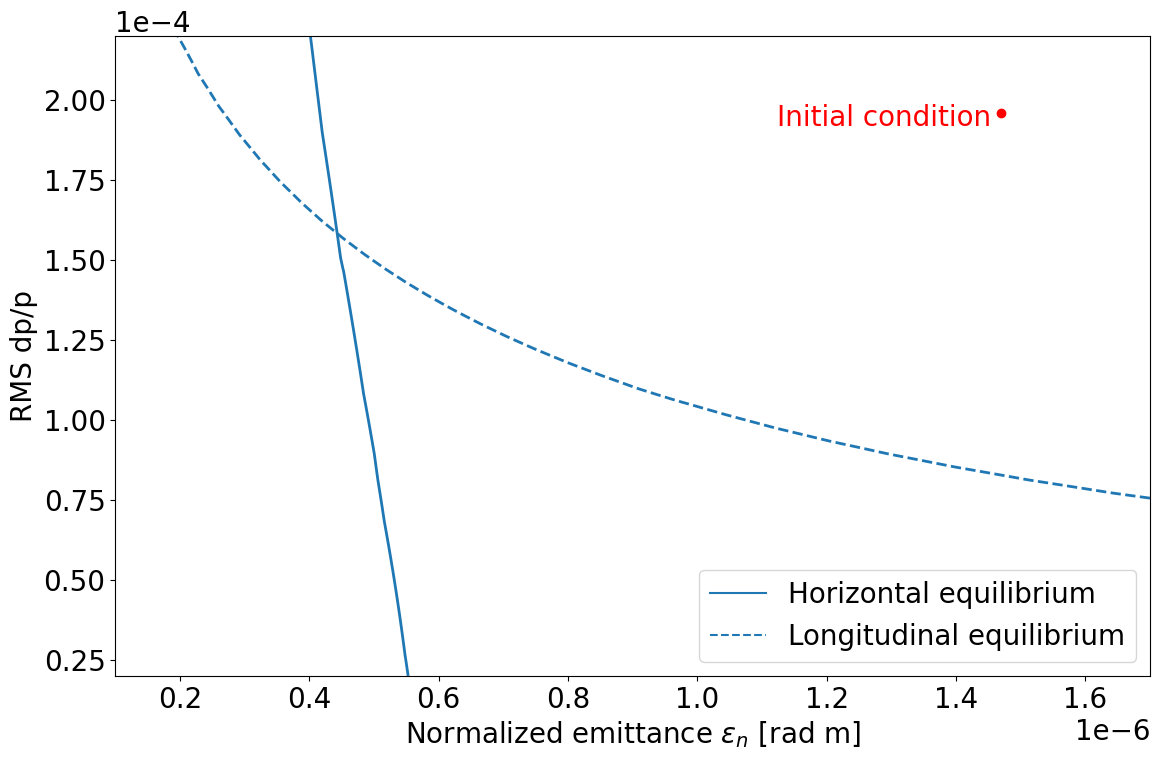

In [103]:
from tqdm import tqdm
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Define custom legend handles with Line2D objects
legend_handles = [
    Line2D([0], [0], linestyle='-', color=cycle[0], label='Horizontal equilibrium'),
    Line2D([0], [0], linestyle='--', color=cycle[0], label='Longitudinal equilibrium'),
]

plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 20})

for i, ion_loop in enumerate([lead]):    
    data = np.load(f'../results/IBS_bunched/{ion_loop.name}.npz')

    growth_rates_2d_x = data['growth_rates_2d_x']
    growth_rates_2d_y = data['growth_rates_2d_y']
    growth_rates_2d_z = 0.5*data['growth_rates_2d_z']
    sig_delta_list = data['sig_delta_list']
    n_emitt_list = data['n_emitt_list']
   
    loaded_data = np.load(f'../results/optimal_laser_x/{ion_loop.name}.npz')
    transverse_growth_rate_list = loaded_data['transverse_growth_rate_list']
    longitudinal_growth_rate_list=loaded_data['longitudinal_growth_rate_list']
   
    threshold_transverse = -min(transverse_growth_rate_list)  # Set the threshold value
   
    plt.contour(n_emitt_list, sig_delta_list, growth_rates_2d_x, levels=[threshold_transverse, np.inf],
                 colors=cycle[i], linewidths=2)

    min_transverse_index = np.argmin(transverse_growth_rate_list)
    threshold_longitudinal = -longitudinal_growth_rate_list[min_transverse_index]  # Set the threshold value
    
    plt.contour(n_emitt_list, sig_delta_list, growth_rates_2d_z, levels=[threshold_longitudinal],
                 colors=cycle[i], linestyles='--', linewidths=2)
    

plt.scatter(0.98*injection_nemitt, 0.98*injection_dp_p, color='red', label='Initial condition')
plt.text(0.97*injection_nemitt, 0.96*injection_dp_p, 'Initial condition', color='red', fontsize=20, ha='right')


plt.xlabel('Normalized emittance $\\epsilon_n$ [rad m]', fontsize=20)
plt.ylabel('RMS dp/p', fontsize=20)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
plt.legend(handles=legend_handles, loc='lower right', fontsize='medium')


plt.tight_layout()
# plt.savefig('figures/Equilibrium_emittance.png', dpi=300)
plt.show()

In [104]:
threshold_longitudinal = -longitudinal_growth_rate_list[min_transverse_index]  # Set the threshold value

0it [00:00, ?it/s]

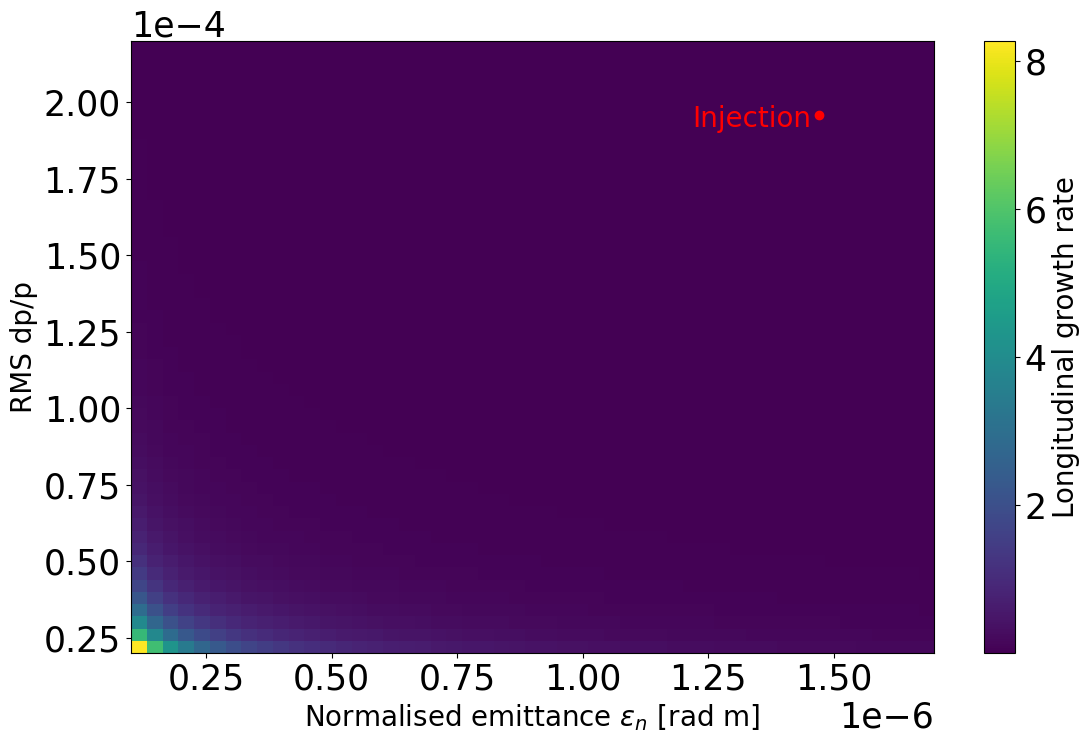

1it [00:00,  5.76it/s]


In [105]:
injection_nemitt = 1.5*1e-6 # m*rad (normalized emittance)
injection_dp_p = 2e-4

for i,ion_loop in tqdm(enumerate([lead])):

    data = np.load(f'../results/IBS_bunched/{ion_loop.name}.npz')

    growth_rates_2d_x = data['growth_rates_2d_x']
    growth_rates_2d_y = data['growth_rates_2d_y']
    growth_rates_2d_z = 0.5*data['growth_rates_2d_z']
    #max_growth_rate=np.maximum(growth_rates_2d_x,growth_rates_2d_y,growth_rates_2d_z)
    # max_growth_rate = np.maximum.reduce([growth_rates_2d_x, growth_rates_2d_y, growth_rates_2d_z])
    # max_growth_rate=growth_rates_2d_x
    sig_delta_list = data['sig_delta_list']
    n_emitt_list = data['n_emitt_list']
    total_intensity = data['total_intensity']

    threshold_longitudinal = -longitudinal_growth_rate_list[min_transverse_index]  # Set the threshold value

    plt.figure(figsize=(12, 8))
    plt.rcParams.update({'font.size': 25})

    # Plot the heatmap
    plt.imshow(growth_rates_2d_z, extent=[n_emitt_list.min(), n_emitt_list.max(), sig_delta_list[0], sig_delta_list[-1]],
               aspect='auto', origin='lower', cmap='viridis',norm=None)
       
    cbar = plt.colorbar()
    cbar.set_label('Longitudinal growth rate', fontsize=20)

    # Add injection point
    plt.scatter(0.98*injection_nemitt, 0.98*injection_dp_p, color='red', label='Injection Point')
    plt.text(0.97*injection_nemitt, 0.96*injection_dp_p, 'Injection', color='red', fontsize=20, ha='right')

    #contour = plt.contour(geo_epsx_list, sig_delta_list, growth_rates_2d_x, levels=[threshold], colors='red', linewidths=2)
    plt.xlabel('Normalised emittance $\\epsilon_n$ [rad m]', fontsize=20)
    plt.ylabel('RMS dp/p', fontsize=20)
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
    plt.tight_layout()
    # plt.savefig('Lead_cooling_IBS_regime.png', dpi=300)
    plt.show()


zoom in on upper right corner

0it [00:00, ?it/s]

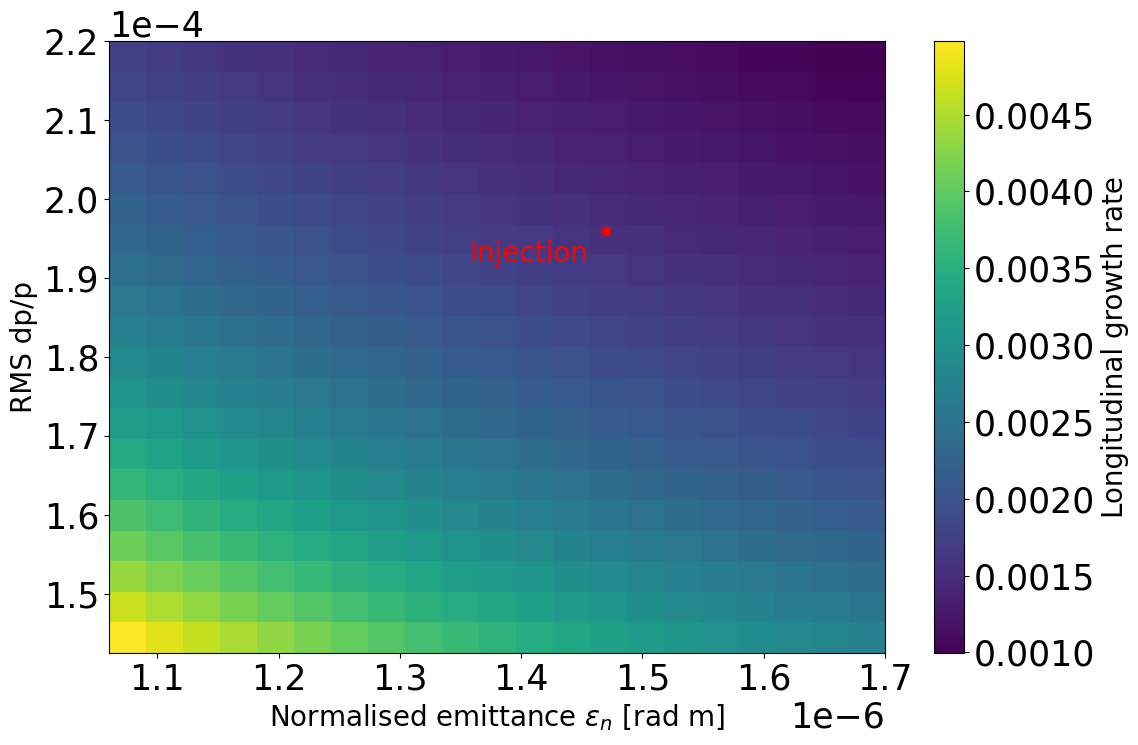

1it [00:00,  4.85it/s]


In [106]:
injection_nemitt = 1.5*1e-6 # m*rad (normalized emittance)
injection_dp_p = 2e-4

for i,ion_loop in tqdm(enumerate([lead])):

    data = np.load(f'../results/IBS_bunched/{ion_loop.name}.npz')

    growth_rates_2d_x = data['growth_rates_2d_x']
    growth_rates_2d_y = data['growth_rates_2d_y']
    growth_rates_2d_z = 0.5*data['growth_rates_2d_z']
    #max_growth_rate=np.maximum(growth_rates_2d_x,growth_rates_2d_y,growth_rates_2d_z)
    # max_growth_rate = np.maximum.reduce([growth_rates_2d_x, growth_rates_2d_y, growth_rates_2d_z])
    # max_growth_rate=growth_rates_2d_x
    sig_delta_list = data['sig_delta_list'][30::]
    n_emitt_list = data['n_emitt_list'][30::]
    total_intensity = data['total_intensity']

    threshold_longitudinal = -longitudinal_growth_rate_list[min_transverse_index]  # Set the threshold value

    plt.figure(figsize=(12, 8))
    plt.rcParams.update({'font.size': 25})

    # Plot the heatmap
    plt.imshow(growth_rates_2d_z[30:, 30:], extent=[n_emitt_list.min(), n_emitt_list.max(), sig_delta_list[0], sig_delta_list[-1]],
               aspect='auto', origin='lower', cmap='viridis',norm=None)
       
    cbar = plt.colorbar()
    cbar.set_label('Longitudinal growth rate', fontsize=20)

    # Add injection point
    plt.scatter(0.98*injection_nemitt, 0.98*injection_dp_p, color='red', label='Injection Point')
    plt.text(0.97*injection_nemitt, 0.96*injection_dp_p, 'Injection', color='red', fontsize=20, ha='right')

    #contour = plt.contour(geo_epsx_list, sig_delta_list, growth_rates_2d_x, levels=[threshold], colors='red', linewidths=2)
    plt.xlabel('Normalised emittance $\\epsilon_n$ [rad m]', fontsize=20)
    plt.ylabel('RMS dp/p', fontsize=20)
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
    plt.tight_layout()
        # plt.savefig('Lead_cooling_IBS_regime.png', dpi=300)
    plt.show()


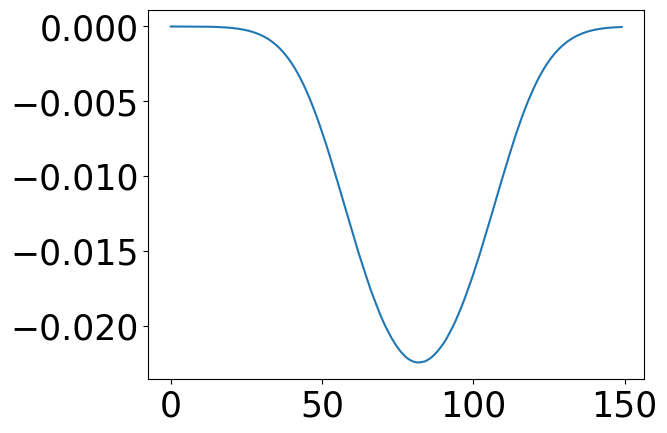

In [107]:
plt.figure()
plt.plot(longitudinal_growth_rate_list)
plt.show()

In [108]:
# print('transverse:',threshold_transverse)
# print('longitudinal:',threshold_longitudinal)


Draw arrows for cooling

compare IBS with full lattice

1it [00:00,  7.19it/s]


56
82
laser offset -0.03355704697986534 mm


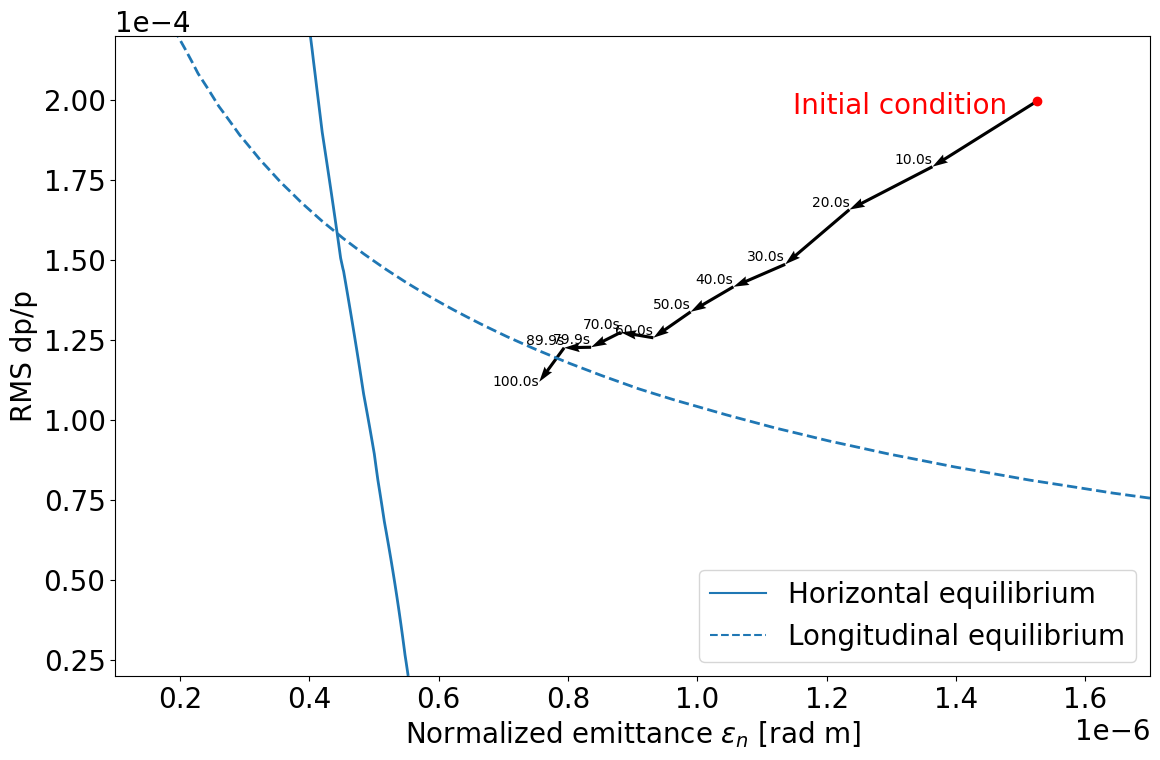

In [109]:
from tqdm import tqdm
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 20})

cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

for i, ion_loop in tqdm(enumerate([lead])):    
    data = np.load(f'../results/IBS_bunched/{ion_loop.name}.npz')
    linear_results = np.load(f'results/{ion_loop.name}.npz')

    delta = linear_results['delta']
    emittance_x = linear_results['emittance_x']
    time = linear_results['time']
    rms_dp_p = np.std(delta, axis=1)

    index_closest_to_40 = np.argmin(np.abs(time - 40))

    emittance_x_values = emittance_x[:]
    rms_dp_p_values = rms_dp_p[:]
    
    # Plot the contour
    growth_rates_2d_x = data['growth_rates_2d_x']
    growth_rates_2d_y = data['growth_rates_2d_y']
    growth_rates_2d_z = 0.5*data['growth_rates_2d_z']
    sig_delta_list = data['sig_delta_list']
    n_emitt_list = data['n_emitt_list']
    total_intensity = data['total_intensity']
    
    loaded_data = np.load(f'../results/optimal_laser_x/{ion_loop.name}.npz')
    transverse_growth_rate_list = loaded_data['transverse_growth_rate_list']
    longitudinal_growth_rate_list=loaded_data['longitudinal_growth_rate_list']
    laser_x_list=loaded_data['laser_x_list']
   
    min_transverse_index = np.argmin(transverse_growth_rate_list)
    min_longitudinal_index = np.argmin(longitudinal_growth_rate_list)
    print(min_transverse_index)
    print(min_longitudinal_index)

    #69  #74=0
    laser_position_index = 74
    laser_offset = laser_x_list[laser_position_index]
    print('laser offset',laser_offset*1e3,'mm')
    threshold_longitudinal2 = -longitudinal_growth_rate_list[laser_position_index]  # Set the threshold value
    threshold_transverse2 = -(transverse_growth_rate_list[laser_position_index])  # Set the threshold value

    
    threshold_transverse = -min(transverse_growth_rate_list)  # Set the threshold value
    min_transverse_index = np.argmin(transverse_growth_rate_list)
    threshold_longitudinal = -longitudinal_growth_rate_list[min_transverse_index]  # Set the threshold value
    

    plt.contour(n_emitt_list, sig_delta_list, growth_rates_2d_x, levels=[threshold_transverse, np.inf],
                    colors=cycle[0], linewidths=2)   

    plt.contour(n_emitt_list, sig_delta_list, growth_rates_2d_z, levels=[threshold_longitudinal],
                    colors=cycle[0], linestyles='--', linewidths=2)
    


    # plt.contour(n_emitt_list, sig_delta_list, growth_rates_2d_x, levels=[threshold_transverse2, np.inf],
    #                 colors=cycle[2], linewidths=2)   

    # plt.contour(n_emitt_list, sig_delta_list, growth_rates_2d_z, levels=[threshold_longitudinal2],
    #                 colors=cycle[2], linestyles='--', linewidths=2)


    # Define the number of segments for each arrow
    num_segments = 10
    
    # Calculate the step size for each segment
    step_size = len(time) // num_segments
    
    # Plot each segment as a quiver plot
    for j in range(num_segments):
        # Calculate the indices for the start and end points of the segment
        start_idx = j * step_size
        end_idx = min((j + 1) * step_size, len(time) - 1)
        
        # Calculate the start and end points of the segment
        start_x = emittance_x_values[start_idx]
        end_x = emittance_x_values[end_idx]
        
        start_y = rms_dp_p_values[start_idx]
        end_y = rms_dp_p_values[end_idx]
        
        # Plot the quiver plot for the segment
        arrow = plt.quiver(start_x, start_y, end_x - start_x, end_y - start_y, scale=1,
                            scale_units='xy', angles='xy', color='black', width=0.003)
        
        # Add time annotation at the end of the arrow
        time_annotation_x = end_x
        time_annotation_y = end_y
        if j == num_segments - 1:  # for the last arrow
            time_annotation_text = "100.0s"
            time_annotation_y=0.98*time_annotation_y
        else:
            time_annotation_text = f"{time[end_idx]:.1f}s"
        plt.text(time_annotation_x, time_annotation_y, time_annotation_text, color='black', fontsize=10, ha='right', va='bottom')
  

# Plotting the arrows on top completes, now let's adjust other settings        
injection_nemitt = emittance_x[0]
injection_dp_p = rms_dp_p[0]

plt.scatter(injection_nemitt, injection_dp_p, color='red', label='Initial condition')
plt.text(0.97*injection_nemitt, 0.98*injection_dp_p, 'Initial condition', color='red', fontsize=20, ha='right')        

plt.xlim([n_emitt_list[0], n_emitt_list[-1]])
plt.xlabel('Normalized emittance $\\epsilon_n$ [rad m]', fontsize=20)
plt.ylabel('RMS dp/p', fontsize=20)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

plt.legend(handles=[
    Line2D([0], [0], linestyle='-', color=cycle[0],  label='Horizontal equilibrium '),
    Line2D([0], [0], linestyle='--', color=cycle[0], label='Longitudinal equilibrium'),
          
], loc='lower right')


plt.tight_layout()
#plt.savefig('figures/Equilibrium_emittance.png', dpi=300)
plt.show()

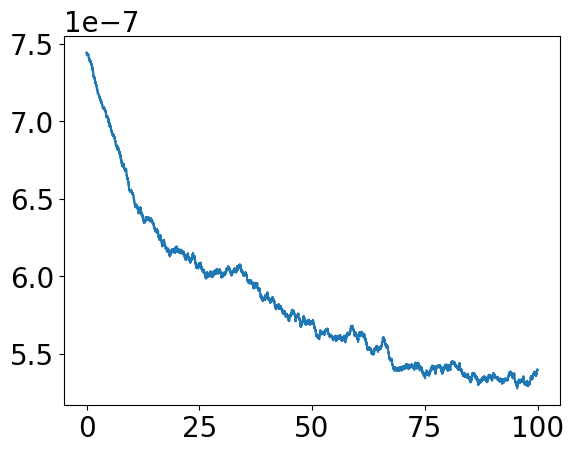

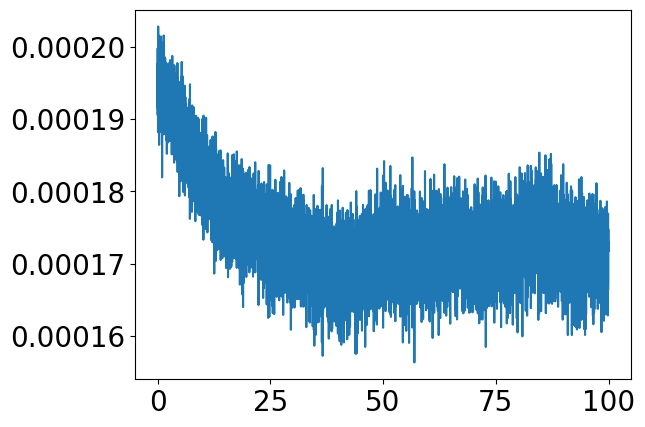

In [110]:
IBS_results = np.load(f'results/IBS/{ion_loop.name}_small.npz')

delta_IBS = IBS_results['delta']
emittance_x_IBS = IBS_results['emittance_x']
time_IBS = IBS_results['time']
rms_dp_p_IBS = np.std(delta_IBS, axis=1)

emittance_x_IBS.shape

# IBS_results = np.load(f'results/IBS/{ion_loop.name}.npz')

# delta_IBS = IBS_results['delta']
# emittance_x_IBS = IBS_results['emittance_x']
# time_IBS = IBS_results['time']
# rms_dp_p_IBS = np.std(delta_IBS, axis=1)

emittance_x_IBS.shape

plt.figure()
plt.plot(time_IBS,emittance_x_IBS)
plt.show()

plt.figure()
plt.plot(time_IBS,rms_dp_p_IBS)
plt.show()

compare IBS with linear representation

1it [00:00,  4.45it/s]

56
82
laser offset -0.03355704697986534 mm


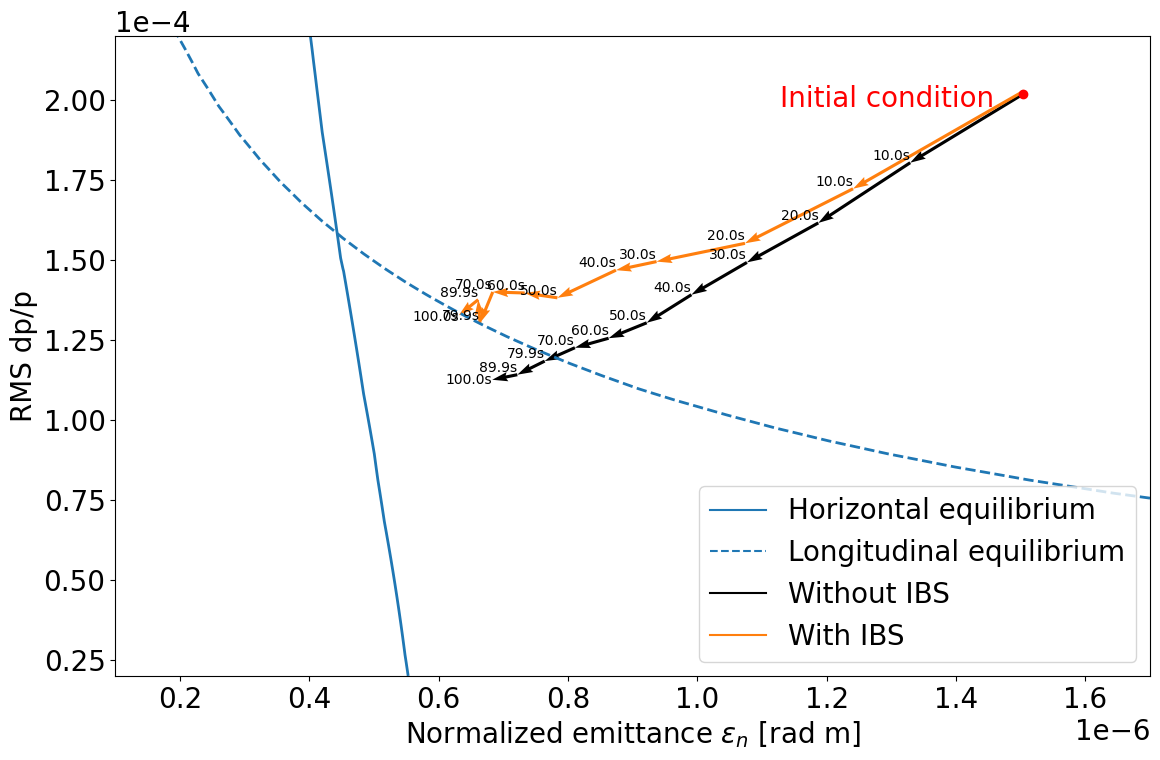

In [111]:
from tqdm import tqdm
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 20})

cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

for i, ion_loop in tqdm(enumerate([lead])):    
    data = np.load(f'../results/IBS_bunched/{ion_loop.name}.npz')
    linear_results = np.load(f'../results/transverse/{ion_loop.name}.npz')

    delta_linear = linear_results['delta']
    emittance_x_linear = linear_results['emittance_x']
    time_linear = linear_results['time']
    rms_dp_p_linear = np.std(delta_linear, axis=1)

    IBS_results = np.load(f'results/IBS/{ion_loop.name}.npz')

    delta_IBS = IBS_results['delta']
    emittance_x_IBS = IBS_results['emittance_x']
    time_IBS = IBS_results['time']
    rms_dp_p_IBS = np.std(delta_IBS, axis=1)

    index_closest_to_40 = np.argmin(np.abs(time_linear - 40))

    emittance_x_linear = emittance_x_linear[:]
    rms_dp_p__linear = rms_dp_p_linear[:]
    
    # Plot the contour
    growth_rates_2d_x = data['growth_rates_2d_x']
    growth_rates_2d_y = data['growth_rates_2d_y']
    growth_rates_2d_z = 0.5*data['growth_rates_2d_z']
    sig_delta_list = data['sig_delta_list']
    n_emitt_list = data['n_emitt_list']
    total_intensity = data['total_intensity']
    
    loaded_data = np.load(f'../results/optimal_laser_x/{ion_loop.name}.npz')
    transverse_growth_rate_list = loaded_data['transverse_growth_rate_list']
    longitudinal_growth_rate_list=loaded_data['longitudinal_growth_rate_list']
    laser_x_list=loaded_data['laser_x_list']
   
    min_transverse_index = np.argmin(transverse_growth_rate_list)
    min_longitudinal_index = np.argmin(longitudinal_growth_rate_list)
    print(min_transverse_index)
    print(min_longitudinal_index)

    #69  #74=0
    laser_position_index = 74
    laser_offset = laser_x_list[laser_position_index]
    print('laser offset',laser_offset*1e3,'mm')
    threshold_longitudinal2 = -longitudinal_growth_rate_list[laser_position_index]  # Set the threshold value
    threshold_transverse2 = -(transverse_growth_rate_list[laser_position_index])  # Set the threshold value

    
    threshold_transverse = -min(transverse_growth_rate_list)  # Set the threshold value
    min_transverse_index = np.argmin(transverse_growth_rate_list)
    threshold_longitudinal = -longitudinal_growth_rate_list[min_transverse_index]  # Set the threshold value
    

    plt.contour(n_emitt_list, sig_delta_list, growth_rates_2d_x, levels=[threshold_transverse, np.inf],
                    colors=cycle[0], linewidths=2)   

    plt.contour(n_emitt_list, sig_delta_list, growth_rates_2d_z, levels=[threshold_longitudinal],
                    colors=cycle[0], linestyles='--', linewidths=2)
    


    # plt.contour(n_emitt_list, sig_delta_list, growth_rates_2d_x, levels=[threshold_transverse2, np.inf],
    #                 colors=cycle[2], linewidths=2)   

    # plt.contour(n_emitt_list, sig_delta_list, growth_rates_2d_z, levels=[threshold_longitudinal2],
    #                 colors=cycle[2], linestyles='--', linewidths=2)


    # Define the number of segments for each arrow
    num_segments = 10
    
    # Calculate the step size for each segment
    step_size = len(time_linear) // num_segments
    
    # Plot linear for each segment as a quiver plot
    for j in range(num_segments):
        # Calculate the indices for the start and end points of the segment
        start_idx = j * step_size
        end_idx = min((j + 1) * step_size, len(time_linear) - 1)
        
        # Calculate the start and end points of the segment
        start_x = emittance_x_linear[start_idx]
        end_x = emittance_x_linear[end_idx]
        
        start_y = rms_dp_p__linear[start_idx]
        end_y = rms_dp_p__linear[end_idx]
        
        # Plot the quiver plot for the segment
        arrow = plt.quiver(start_x, start_y, end_x - start_x, end_y - start_y, scale=1,
                            scale_units='xy', angles='xy', color='black', width=0.003)
        
        # Add time annotation at the end of the arrow
        time_annotation_x = end_x
        time_annotation_y = end_y
        if j == num_segments - 1:  # for the last arrow
            time_annotation_text = "100.0s"
            time_annotation_y=0.98*time_annotation_y
        else:
            time_annotation_text = f"{time_linear[end_idx]:.1f}s"
        plt.text(time_annotation_x, time_annotation_y, time_annotation_text, color='black', fontsize=10, ha='right', va='bottom')

    step_size = len(time_IBS) // num_segments

    # Plot IBS for each segment as a quiver plot
    for j in range(num_segments):
        # Calculate the indices for the start and end points of the segment
        start_idx = j * step_size
        end_idx = min((j + 1) * step_size, len(time_IBS) - 1)
        
        # Calculate the start and end points of the segment
        start_x = emittance_x_IBS[start_idx]
        end_x = emittance_x_IBS[end_idx]
        
        start_y = rms_dp_p_IBS[start_idx]
        end_y = rms_dp_p_IBS[end_idx]
        
        # Plot the quiver plot for the segment
        arrow = plt.quiver(start_x, start_y, end_x - start_x, end_y - start_y, scale=1,
                            scale_units='xy', angles='xy', color=cycle[1], width=0.003)
        
        # Add time annotation at the end of the arrow
        time_annotation_x = end_x
        time_annotation_y = end_y
        if j == num_segments - 1:  # for the last arrow
            time_annotation_text = "100.0s"
            time_annotation_y=0.98*time_annotation_y
        else:
            time_annotation_text = f"{time_linear[end_idx]:.1f}s"
        plt.text(time_annotation_x, time_annotation_y, time_annotation_text, color='black', fontsize=10, ha='right', va='bottom')

  

# Plotting the arrows on top completes, now let's adjust other settings        
injection_nemitt = emittance_x_linear[0]
injection_dp_p = rms_dp_p_linear[0]

plt.scatter(injection_nemitt, injection_dp_p, color='red', label='Initial condition')
plt.text(0.97*injection_nemitt, 0.98*injection_dp_p, 'Initial condition', color='red', fontsize=20, ha='right')        

plt.xlim([n_emitt_list[0], n_emitt_list[-1]])
plt.xlabel('Normalized emittance $\\epsilon_n$ [rad m]', fontsize=20)
plt.ylabel('RMS dp/p', fontsize=20)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

plt.legend(handles=[
    Line2D([0], [0], linestyle='-', color=cycle[0], label='Horizontal equilibrium'),
    Line2D([0], [0], linestyle='--', color=cycle[0], label='Longitudinal equilibrium'),
    Line2D([0], [0], linestyle='-', color='black', label='Without IBS'),
    Line2D([0], [0], linestyle='-', color=cycle[1], label='With IBS'),
], loc='lower right')


plt.tight_layout()
#plt.savefig('figures/Equilibrium_emittance.png', dpi=300)
plt.show()

also plot arrow with smaller initial emittances

1it [00:00,  2.39it/s]

56
82
laser offset -0.03355704697986534 mm


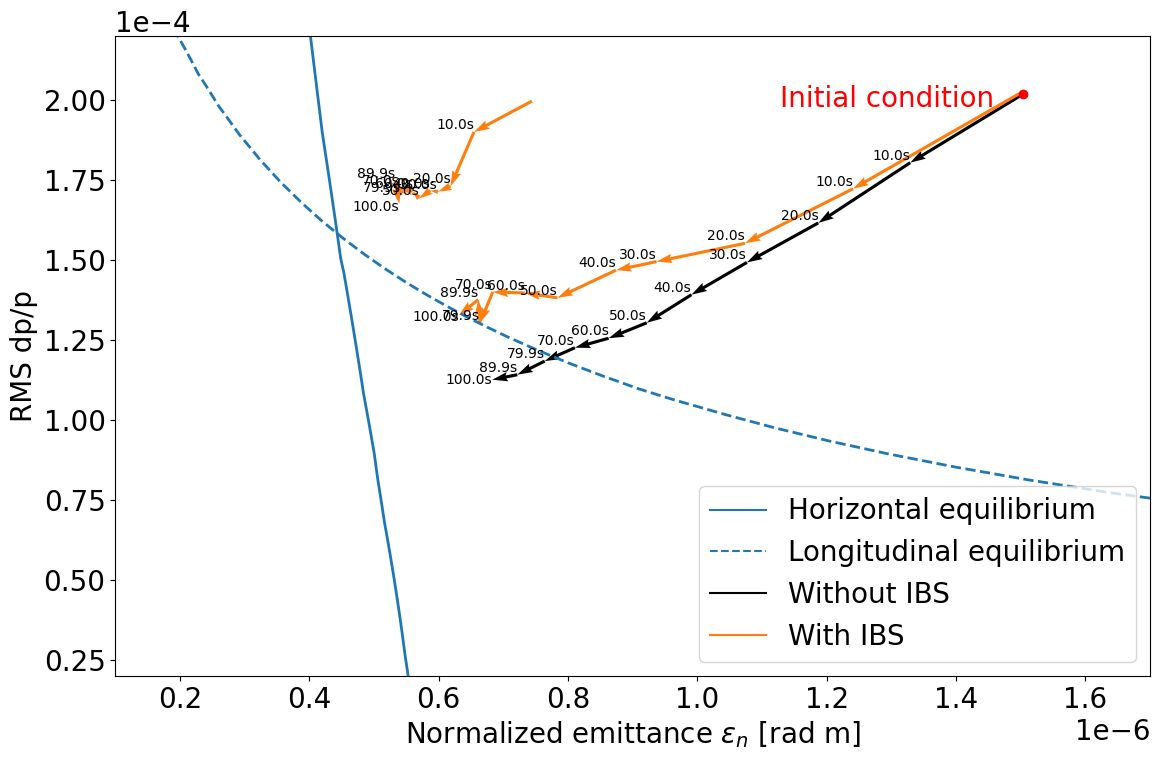

In [112]:
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 20})

cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

for i, ion_loop in tqdm(enumerate([lead])):    
    data = np.load(f'../results/IBS_bunched/{ion_loop.name}.npz')
    linear_results = np.load(f'../results/transverse/{ion_loop.name}.npz')

    delta_linear = linear_results['delta']
    emittance_x_linear = linear_results['emittance_x']
    time_linear = linear_results['time']
    rms_dp_p_linear = np.std(delta_linear, axis=1)
    emittance_x_linear = emittance_x_linear[:]
    rms_dp_p__linear = rms_dp_p_linear[:]

    index_closest_to_40 = np.argmin(np.abs(time_linear - 40))

    #load IBS results
    IBS_results = np.load(f'results/IBS/{ion_loop.name}.npz')

    delta_IBS = IBS_results['delta']
    emittance_x_IBS = IBS_results['emittance_x']
    time_IBS = IBS_results['time']
    rms_dp_p_IBS = np.std(delta_IBS, axis=1)

    #load IBS results small emittance
    IBS_small_results = np.load(f'results/IBS/{ion_loop.name}_small.npz')

    delta_IBS_small = IBS_small_results['delta']
    emittance_x_IBS_small = IBS_small_results['emittance_x']
    time_IBS_small = IBS_small_results['time']
    rms_dp_p_IBS_small = np.std(delta_IBS_small, axis=1) 

    #load IBS results small dp_p
    IBS_small_results_dp_p = np.load(f'results/IBS/{ion_loop.name}_small_dp_p.npz')

    delta_IBS_small_dp_p = IBS_small_results_dp_p['delta']
    emittance_x_IBS_small_dp_p = IBS_small_results_dp_p['emittance_x']
    time_IBS_small_dp_p = IBS_small_results_dp_p['time']
    rms_dp_p_IBS_small_dp_p = np.std(delta_IBS_small_dp_p, axis=1) 
    
    # Plot the contour
    growth_rates_2d_x = data['growth_rates_2d_x']
    growth_rates_2d_y = data['growth_rates_2d_y']
    growth_rates_2d_z = 0.5*data['growth_rates_2d_z']
    sig_delta_list = data['sig_delta_list']
    n_emitt_list = data['n_emitt_list']
    total_intensity = data['total_intensity']
    
    loaded_data = np.load(f'../results/optimal_laser_x/{ion_loop.name}.npz')
    transverse_growth_rate_list = loaded_data['transverse_growth_rate_list']
    longitudinal_growth_rate_list=loaded_data['longitudinal_growth_rate_list']
    laser_x_list=loaded_data['laser_x_list']
   
    min_transverse_index = np.argmin(transverse_growth_rate_list)
    min_longitudinal_index = np.argmin(longitudinal_growth_rate_list)
    print(min_transverse_index)
    print(min_longitudinal_index)

    #69  #74=0
    laser_position_index = 74
    laser_offset = laser_x_list[laser_position_index]
    print('laser offset',laser_offset*1e3,'mm')
    threshold_longitudinal2 = -longitudinal_growth_rate_list[laser_position_index]  # Set the threshold value
    threshold_transverse2 = -(transverse_growth_rate_list[laser_position_index])  # Set the threshold value

    
    threshold_transverse = -min(transverse_growth_rate_list)  # Set the threshold value
    min_transverse_index = np.argmin(transverse_growth_rate_list)
    threshold_longitudinal = -longitudinal_growth_rate_list[min_transverse_index]  # Set the threshold value
    

    plt.contour(n_emitt_list, sig_delta_list, growth_rates_2d_x, levels=[threshold_transverse, np.inf],
                    colors=cycle[0], linewidths=2)   

    plt.contour(n_emitt_list, sig_delta_list, growth_rates_2d_z, levels=[threshold_longitudinal],
                    colors=cycle[0], linestyles='--', linewidths=2)
    


    # plt.contour(n_emitt_list, sig_delta_list, growth_rates_2d_x, levels=[threshold_transverse2, np.inf],
    #                 colors=cycle[2], linewidths=2)   

    # plt.contour(n_emitt_list, sig_delta_list, growth_rates_2d_z, levels=[threshold_longitudinal2],
    #                 colors=cycle[2], linestyles='--', linewidths=2)


    # Define the number of segments for each arrow
    num_segments = 10
    
    # Calculate the step size for each segment
    step_size = len(time_linear) // num_segments
    
    # Plot linear for each segment as a quiver plot
    for j in range(num_segments):
        # Calculate the indices for the start and end points of the segment
        start_idx = j * step_size
        end_idx = min((j + 1) * step_size, len(time_linear) - 1)
        
        # Calculate the start and end points of the segment
        start_x = emittance_x_linear[start_idx]
        end_x = emittance_x_linear[end_idx]
        
        start_y = rms_dp_p__linear[start_idx]
        end_y = rms_dp_p__linear[end_idx]
        
        # Plot the quiver plot for the segment
        arrow = plt.quiver(start_x, start_y, end_x - start_x, end_y - start_y, scale=1,
                            scale_units='xy', angles='xy', color='black', width=0.003)
        
        # Add time annotation at the end of the arrow
        time_annotation_x = end_x
        time_annotation_y = end_y
        if j == num_segments - 1:  # for the last arrow
            time_annotation_text = "100.0s"
            time_annotation_y=0.98*time_annotation_y
        else:
            time_annotation_text = f"{time_linear[end_idx]:.1f}s"
        plt.text(time_annotation_x, time_annotation_y, time_annotation_text, color='black', fontsize=10, ha='right', va='bottom')

    step_size = len(time_IBS) // num_segments

    # Plot IBS for each segment as a quiver plot
    for j in range(num_segments):
        # Calculate the indices for the start and end points of the segment
        start_idx = j * step_size
        end_idx = min((j + 1) * step_size, len(time_IBS) - 1)
        
        # Calculate the start and end points of the segment
        start_x = emittance_x_IBS[start_idx]
        end_x = emittance_x_IBS[end_idx]
        
        start_y = rms_dp_p_IBS[start_idx]
        end_y = rms_dp_p_IBS[end_idx]
        
        # Plot the quiver plot for the segment
        arrow = plt.quiver(start_x, start_y, end_x - start_x, end_y - start_y, scale=1,
                            scale_units='xy', angles='xy', color=cycle[1], width=0.003)
        
        # Add time annotation at the end of the arrow
        time_annotation_x = end_x
        time_annotation_y = end_y
        if j == num_segments - 1:  # for the last arrow
            time_annotation_text = "100.0s"
            time_annotation_y=0.98*time_annotation_y
        else:
            time_annotation_text = f"{time_linear[end_idx]:.1f}s"
        plt.text(time_annotation_x, time_annotation_y, time_annotation_text, color='black', fontsize=10, ha='right', va='bottom')

    # Plot IBS with small emittance for each segment as a quiver plot
    for j in range(num_segments):
        # Calculate the indices for the start and end points of the segment
        start_idx = j * step_size
        end_idx = min((j + 1) * step_size, len(time_IBS_small) - 1)
        
        # Calculate the start and end points of the segment
        start_x = emittance_x_IBS_small[start_idx]
        end_x = emittance_x_IBS_small[end_idx]
        
        start_y = rms_dp_p_IBS_small[start_idx]
        end_y = rms_dp_p_IBS_small[end_idx]
        
        # Plot the quiver plot for the segment
        arrow = plt.quiver(start_x, start_y, end_x - start_x, end_y - start_y, scale=1,
                            scale_units='xy', angles='xy', color=cycle[1], width=0.003)
        
        # Add time annotation at the end of the arrow
        time_annotation_x = end_x
        time_annotation_y = end_y
        if j == num_segments - 1:  # for the last arrow
            time_annotation_text = "100.0s"
            time_annotation_y=0.98*time_annotation_y
        else:
            time_annotation_text = f"{time_linear[end_idx]:.1f}s"
        plt.text(time_annotation_x, time_annotation_y, time_annotation_text, color='black', fontsize=10, ha='right', va='bottom')
  

# Plotting the arrows on top completes, now let's adjust other settings        
injection_nemitt = emittance_x_linear[0]
injection_dp_p = rms_dp_p_linear[0]

plt.scatter(injection_nemitt, injection_dp_p, color='red', label='Initial condition')
plt.text(0.97*injection_nemitt, 0.98*injection_dp_p, 'Initial condition', color='red', fontsize=20, ha='right')        

plt.xlim([n_emitt_list[0], n_emitt_list[-1]])
plt.xlabel('Normalized emittance $\\epsilon_n$ [rad m]', fontsize=20)
plt.ylabel('RMS dp/p', fontsize=20)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

plt.legend(handles=[
    Line2D([0], [0], linestyle='-', color=cycle[0], label='Horizontal equilibrium'),
    Line2D([0], [0], linestyle='--', color=cycle[0], label='Longitudinal equilibrium'),
    Line2D([0], [0], linestyle='-', color='black', label='Without IBS'),
    Line2D([0], [0], linestyle='-', color=cycle[1], label='With IBS')
], loc='lower right')


plt.tight_layout()
#plt.savefig('figures/Equilibrium_emittance.png', dpi=300)
plt.show()

In [113]:
IBS_small_results_dp_p

NpzFile 'results/IBS/Pb$^{79+}$_small_dp_p.npz' with keys: x, px, y, py, zeta...

1it [00:00,  2.37it/s]


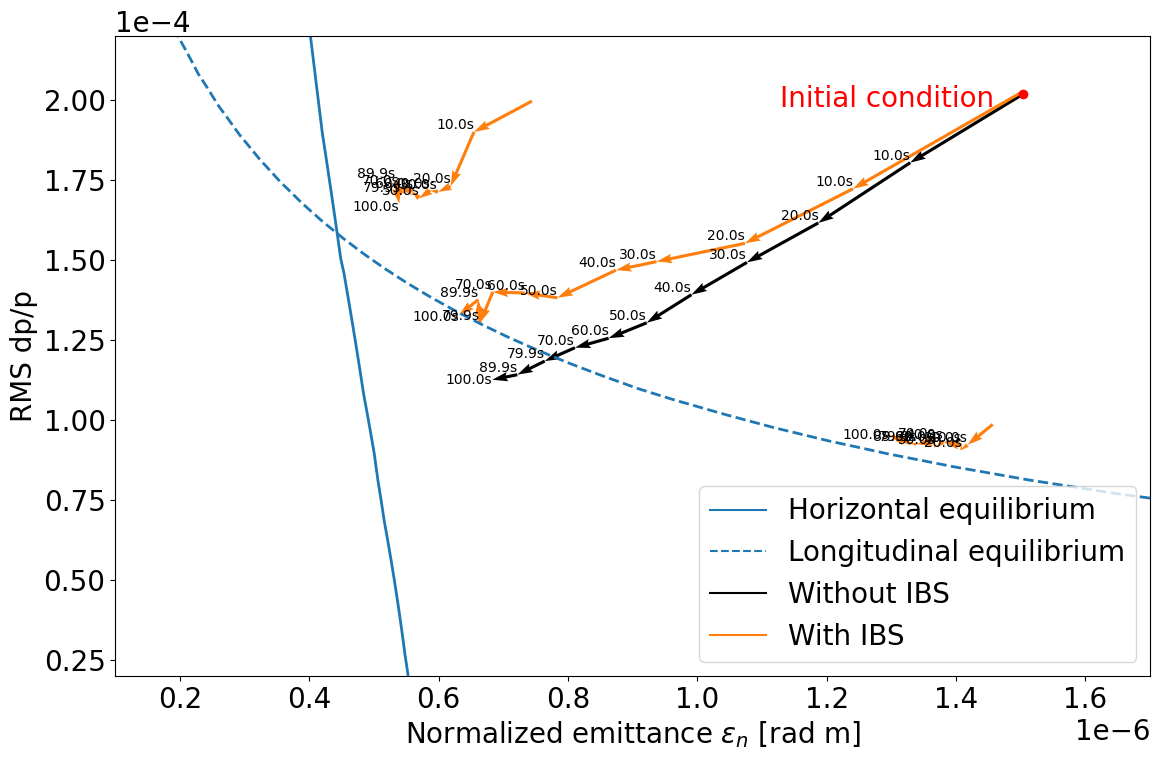

In [114]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from tqdm import tqdm

def plot_quiver(emittance, rms_dp_p, time, color, label):
    num_segments = 10
    step_size = len(time) // num_segments

    for j in range(num_segments):
        start_idx = j * step_size
        end_idx = min((j + 1) * step_size, len(time) - 1)
        
        start_x = emittance[start_idx]
        end_x = emittance[end_idx]
        
        start_y = rms_dp_p[start_idx]
        end_y = rms_dp_p[end_idx]
        
        arrow = plt.quiver(start_x, start_y, end_x - start_x, end_y - start_y, scale=1,
                            scale_units='xy', angles='xy', color=color, width=0.003)
        
        time_annotation_x = end_x
        time_annotation_y = end_y
        if j == num_segments - 1:
            time_annotation_text = "100.0s"
            time_annotation_y = 0.98 * time_annotation_y
        else:
            time_annotation_text = f"{time[end_idx]:.1f}s"
        plt.text(time_annotation_x, time_annotation_y, time_annotation_text, color='black', fontsize=10, ha='right', va='bottom')

plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 20})

cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

for i, ion_loop in tqdm(enumerate([lead])):
    data = np.load(f'../results/IBS_bunched/{ion_loop.name}.npz')
    linear_results = np.load(f'../results/transverse/{ion_loop.name}.npz')
    IBS_results = np.load(f'results/IBS/{ion_loop.name}.npz')
    IBS_small_results = np.load(f'results/IBS/{ion_loop.name}_small.npz')
    IBS_small_results_dp_p = np.load(f'results/IBS/{ion_loop.name}_small_dp_p.npz')

    delta_linear = linear_results['delta']
    emittance_x_linear = linear_results['emittance_x']
    time_linear = linear_results['time']
    rms_dp_p_linear = np.std(delta_linear, axis=1)

    delta_IBS = IBS_results['delta']
    emittance_x_IBS = IBS_results['emittance_x']
    time_IBS = IBS_results['time']
    rms_dp_p_IBS = np.std(delta_IBS, axis=1)

    delta_IBS_small = IBS_small_results['delta']
    emittance_x_IBS_small = IBS_small_results['emittance_x']
    time_IBS_small = IBS_small_results['time']
    rms_dp_p_IBS_small = np.std(delta_IBS_small, axis=1)

    delta_IBS_small_dp_p = IBS_small_results_dp_p['delta']
    emittance_x_IBS_small_dp_p = IBS_small_results_dp_p['emittance_x']
    time_IBS_small_dp_p = IBS_small_results_dp_p['time']
    rms_dp_p_IBS_small_dp_p = np.std(delta_IBS_small_dp_p, axis=1)

    growth_rates_2d_x = data['growth_rates_2d_x']
    growth_rates_2d_y = data['growth_rates_2d_y']
    growth_rates_2d_z = 0.5 * data['growth_rates_2d_z']
    sig_delta_list = data['sig_delta_list']
    n_emitt_list = data['n_emitt_list']

    loaded_data = np.load(f'../results/optimal_laser_x/{ion_loop.name}.npz')
    transverse_growth_rate_list = loaded_data['transverse_growth_rate_list']
    longitudinal_growth_rate_list = loaded_data['longitudinal_growth_rate_list']
    laser_x_list = loaded_data['laser_x_list']

    min_transverse_index = np.argmin(transverse_growth_rate_list)
    min_longitudinal_index = np.argmin(longitudinal_growth_rate_list)

    laser_position_index = 74
    laser_offset = laser_x_list[laser_position_index]
    threshold_longitudinal = -longitudinal_growth_rate_list[min_transverse_index]
    threshold_transverse = -min(transverse_growth_rate_list)

    plt.contour(n_emitt_list, sig_delta_list, growth_rates_2d_x, levels=[threshold_transverse, np.inf],
                colors=cycle[0], linewidths=2)

    plt.contour(n_emitt_list, sig_delta_list, growth_rates_2d_z, levels=[threshold_longitudinal],
                colors=cycle[0], linestyles='--', linewidths=2)

    plot_quiver(emittance_x_linear, rms_dp_p_linear, time_linear, 'black', 'Without IBS')
    plot_quiver(emittance_x_IBS, rms_dp_p_IBS, time_IBS, cycle[1], 'With IBS')
    plot_quiver(emittance_x_IBS_small, rms_dp_p_IBS_small, time_IBS_small, cycle[1], 'With IBS (small emittance)')
    plot_quiver(emittance_x_IBS_small_dp_p, rms_dp_p_IBS_small_dp_p, time_IBS_small_dp_p, cycle[1], 'With IBS (small dp/p)')

injection_nemitt = emittance_x_linear[0]
injection_dp_p = rms_dp_p_linear[0]

plt.scatter(injection_nemitt, injection_dp_p, color='red', label='Initial condition')
plt.text(0.97 * injection_nemitt, 0.98 * injection_dp_p, 'Initial condition', color='red', fontsize=20, ha='right')

plt.xlim([n_emitt_list[0], n_emitt_list[-1]])
plt.xlabel('Normalized emittance $\\epsilon_n$ [rad m]', fontsize=20)
plt.ylabel('RMS dp/p', fontsize=20)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

plt.legend(handles=[
    Line2D([0], [0], linestyle='-', color=cycle[0], label='Horizontal equilibrium'),
    Line2D([0], [0], linestyle='--', color=cycle[0], label='Longitudinal equilibrium'),
    Line2D([0], [0], linestyle='-', color='black', label='Without IBS'),
    Line2D([0], [0], linestyle='-', color=cycle[1], label='With IBS')
], loc='lower right')

plt.tight_layout()
plt.show()


look at phase spaces

In [115]:
data = np.load(f'../results/IBS_bunched/{ion_loop.name}.npz')
linear_results = np.load(f'../results/transverse/{ion_loop.name}.npz')

delta_linear = linear_results['delta']
emittance_x_linear = linear_results['emittance_x']
time_linear = linear_results['time']
rms_dp_p_linear = np.std(delta_linear, axis=1)
emittance_x_linear = emittance_x_linear[:]
rms_dp_p__linear = rms_dp_p_linear[:]

index_closest_to_40 = np.argmin(np.abs(time_linear - 40))

#load IBS results
IBS_results = np.load(f'results/IBS/{ion_loop.name}.npz')

delta_IBS = IBS_results['delta']
emittance_x_IBS = IBS_results['emittance_x']
time_IBS = IBS_results['time']
rms_dp_p_IBS = np.std(delta_IBS, axis=1)

x_IBS = IBS_results['x']
px_IBS = IBS_results['px']

#load IBS results small emittance
IBS_small_results = np.load(f'results/IBS/{ion_loop.name}_small.npz')

delta_IBS_small = IBS_small_results['delta']
emittance_x_IBS_small = IBS_small_results['emittance_x']
time_IBS_small = IBS_small_results['time']
rms_dp_p_IBS_small = np.std(delta_IBS_small, axis=1)      

all_data = np.concatenate(delta_IBS)
x_min, x_max = all_data.min(), all_data.max()

bins = 50

# Determine the maximum y value across all histograms
hist_counts = [np.histogram(data, bins=bins)[0] for data in delta_linear]
y_max = max(max(counts) for counts in hist_counts)

# Function to calculate RMS of the core
def core_rms(delta, percentile=95):
    lower_bound = np.percentile(delta, (100 - percentile) / 2)
    upper_bound = np.percentile(delta, 100 - (100 - percentile) / 2)
    core_values = delta[(delta >= lower_bound) & (delta <= upper_bound)]
    return np.std(core_values)

rms_dp_p_IBS_core = np.array([core_rms(delta) for delta in delta_IBS])
rms_dp_p_linear_core = np.array([core_rms(delta) for delta in delta_linear])

# Function to plot histograms at a given turn and overlay RMS as width
def plot_histogram(turn):
    plt.figure(figsize=(12, 8))
    plt.rcParams.update({'font.size': 20})
    plt.title(f'With IBS: Time {time_IBS[turn]:.1f}')
    
    # Plot histograms
    plt.hist(delta_IBS[turn], bins=bins, histtype='step', label='With IBS')
    plt.hist(delta_linear[turn], bins=bins, histtype='step', label='Without IBS')
    
    # Plot RMS as vertical lines
    plt.axvline(x=rms_dp_p_IBS_core[turn], color='blue', linestyle='--', label='RMS With IBS')
    plt.axvline(x=-rms_dp_p_IBS_core[turn], color='blue', linestyle='--')
    plt.axvline(x=rms_dp_p_linear_core[turn], color='orange', linestyle='--', label='RMS Without IBS')
    plt.axvline(x=-rms_dp_p_linear_core[turn], color='orange', linestyle='--')
    
    plt.xlim(x_min, x_max)  # Set the x-axis limits
    plt.ylim(0, y_max)  # Set the y-axis limits
    plt.ylabel('Count')
    plt.xlabel('dp/p ')
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

interact(plot_histogram, turn=IntSlider(min=0, max=len(time)-1, step=1, value=0))


interactive(children=(IntSlider(value=0, description='turn', max=10015), Output()), _dom_classes=('widget-inte…

<function __main__.plot_histogram(turn)>

find bunch length and momentum spread at the end of the tracking

In [116]:
#load IBS results small emittance
IBS_small_results = np.load(f'results/IBS/{ion_loop.name}_small.npz')
gamma=ion_loop.gamma_cooling
delta_IBS_small = IBS_small_results['delta']
emittance_x_IBS_small = IBS_small_results['emittance_x']
action_y_IBS_small = IBS_small_results['action_y']
emittance_y_IBS_small = np.mean(action_y_IBS_small,axis=1)*gamma/2
#emittance_y_IBS_small = IBS_small_results['emittance_y']
time_IBS_small = IBS_small_results['time']
zeta_IBS_small = IBS_small_results['zeta']

rms_dp_p_IBS_small = np.std(delta_IBS_small, axis=1)     
sigma_z_IBS_small = np.std(zeta_IBS_small, axis=1)     

# Define halfway point index
index = len(sig_delta_list) // 5
index = -1

# Extract the halfway values for dp_p, sigma_z, and emittance
final_dp_p = rms_dp_p_IBS_small[index]
final_sigma_z = sigma_z_IBS_small[index]
final_emittance_x = emittance_x_IBS_small[index]
final_emittance_y = emittance_y_IBS_small[index]

print('final_dp_p =',final_dp_p)
print('final_sigma_z =',final_sigma_z)
print('final_emittance_x =',final_emittance_x)
print('final_emittance_y =',final_emittance_y)

final_dp_p = 0.0001728839510532224
final_sigma_z = 0.05471725110721688
final_emittance_x = 5.39358862649646e-07
final_emittance_y = 7.282517077715001e-07


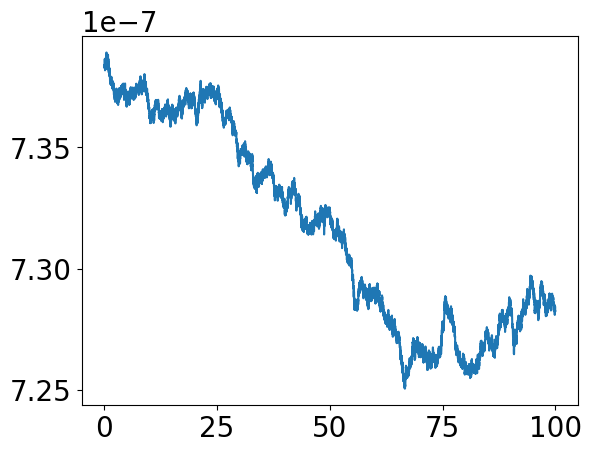

In [117]:
plt.figure()
plt.plot(time,emittance_y_IBS_small)
plt.show()

In [118]:
growth_rates_2d_z.shape
#delta, n_emitt
target_nemitt = 1.5e-6
target_sig_delta = 2e-4

def find_longitudinal_growth_rate(target_nemitt, target_sig_delta):
       
    emitt_index = np.abs(n_emitt_list - target_nemitt).argmin()
    sig_delta_index = np.abs(sig_delta_list - target_sig_delta).argmin()
    growth_rate = growth_rates_2d_z[emitt_index,sig_delta_index]
    print(growth_rate)

find_longitudinal_growth_rate(target_nemitt, target_sig_delta)


0.0014543290748979894


In [119]:
threshold_longitudinal

0.010980105544125254

In [120]:
twiss = line.twiss()
bunch_intensity = ion_loop.bunch_intensity
sigma_z = ion_loop.bunch_length

bm_growth_rates = twiss.get_ibs_growth_rates(
            formalism="bjorken-mtingwa", 
            total_beam_intensity=bunch_intensity,
            nemitt_x=final_emittance_x,
            nemitt_y=final_emittance_y,
            sigma_delta=final_dp_p,
            bunch_length=final_sigma_z,
            bunched=True,
            )

bm_growth_rates.Tx




0.007427771158197377

In [121]:
find_longitudinal_growth_rate(target_nemitt=final_emittance_x,target_sig_delta=final_dp_p)

0.015290902806981954


In [122]:
def calculate_longitudinal_emittance(zeta, delta):
    """
    Calculate the longitudinal emittance for each turn.

    Parameters:
    zeta (numpy.ndarray): 2D array where each row represents a turn and each column represents a particle's zeta value.
    delta (numpy.ndarray): 2D array where each row represents a turn and each column represents a particle's delta value.

    Returns:
    numpy.ndarray: 1D array containing the longitudinal emittance for each turn.
    """
    # Calculate the mean of zeta and delta for each turn
    mean_z = np.mean(zeta, axis=1)
    mean_delta = np.mean(delta, axis=1)

    # Calculate the standard deviation of zeta and delta for each turn
    sigma_z = np.std(zeta, axis=1)
    sigma_delta = np.std(delta, axis=1)

    # Calculate the covariance between zeta and delta for each turn
    cov_z_delta = np.mean(zeta * delta, axis=1) - mean_z * mean_delta

    # Calculate longitudinal emittance for each turn
    longitudinal_emittance = np.sqrt(sigma_z**2 * sigma_delta**2 - cov_z_delta**2)

    return longitudinal_emittance

In [123]:
bm_growth_rates = twiss.get_ibs_growth_rates(
            formalism="bjorken-mtingwa", 
            total_beam_intensity=bunch_intensity,
            nemitt_x=final_emittance_x,
            nemitt_y=final_emittance_y,
            sigma_delta=final_dp_p,
            bunch_length=final_sigma_z,
            bunched=True,
            )

Tx=bm_growth_rates.Tx
Ty=bm_growth_rates.Ty
Tz=bm_growth_rates.Tz

dt=1



# # Calculate new geometric emittances
# new_geom_epsx = initial_geom_epsx * np.exp(dt * Tx)
# new_geom_epsy = initial_geom_epsy * np.exp(dt * Ty)

# Calculate new momentum spread and bunch length
new_sigma_delta = final_dp_p * np.exp(dt * 0.5 * Tz)
new_bunch_length = final_sigma_z * np.exp(dt * 0.5 * Tz)

look at longitudinal emittance instead of rms dp/p

In [124]:
linear_results = np.load(f'results/{ion_loop.name}.npz')

delta = linear_results['delta']
zeta=linear_results['zeta']
emittance_x = linear_results['emittance_x']
time = linear_results['time']
rms_dp_p = np.std(delta, axis=1)

# Calculate mean and standard deviation along the particle axis (axis=1)
mean_z = np.mean(zeta, axis=1)
mean_delta = np.mean(delta, axis=1)
sigma_z = np.std(zeta, axis=1)
sigma_delta = np.std(delta, axis=1)

# Calculate the covariance between zeta and delta for each turn
cov_z_delta = np.mean(zeta * delta, axis=1) - mean_z * mean_delta

# Calculate longitudinal emittance for each turn
longitudinal_emittance = np.sqrt(sigma_z**2 * sigma_delta**2 - cov_z_delta**2)

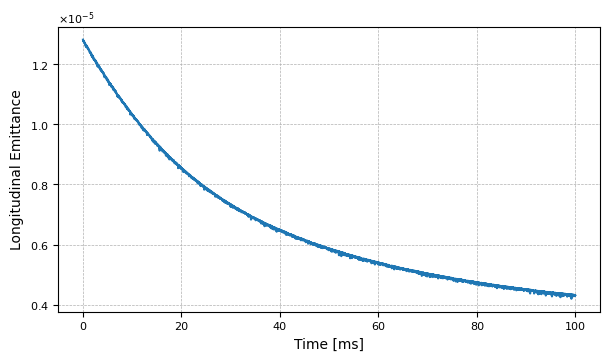

In [125]:
# Calculate figure size based on text width and golden ratio
fig_width = textwidth_in
fig_height = textwidth_in * aspect_ratio

plt.figure(figsize=(fig_width, fig_height))

# Plotting the data
plt.plot(time, longitudinal_emittance)

plt.xlabel('Time [ms]', fontsize=label_fontsize)
plt.ylabel('Longitudinal Emittance', fontsize=label_fontsize)
plt.xticks(fontsize=tick_fontsize)
plt.yticks(fontsize=tick_fontsize)

# Adjust the format of the tick labels
formatter = ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-2, 2))
plt.gca().yaxis.set_major_formatter(formatter)
plt.gca().yaxis.get_offset_text().set_fontsize(offset_text_fontsize)  # Adjust the font size of the offset text

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
#plt.savefig('figures/longitudinal_emittance.png', dpi=300)  # Save with high resolution
plt.show()

look at longitudinal emittance in 2d plot instead of dp_p

1it [00:00,  3.43it/s]

56
82
laser offset -0.03355704697986534 mm


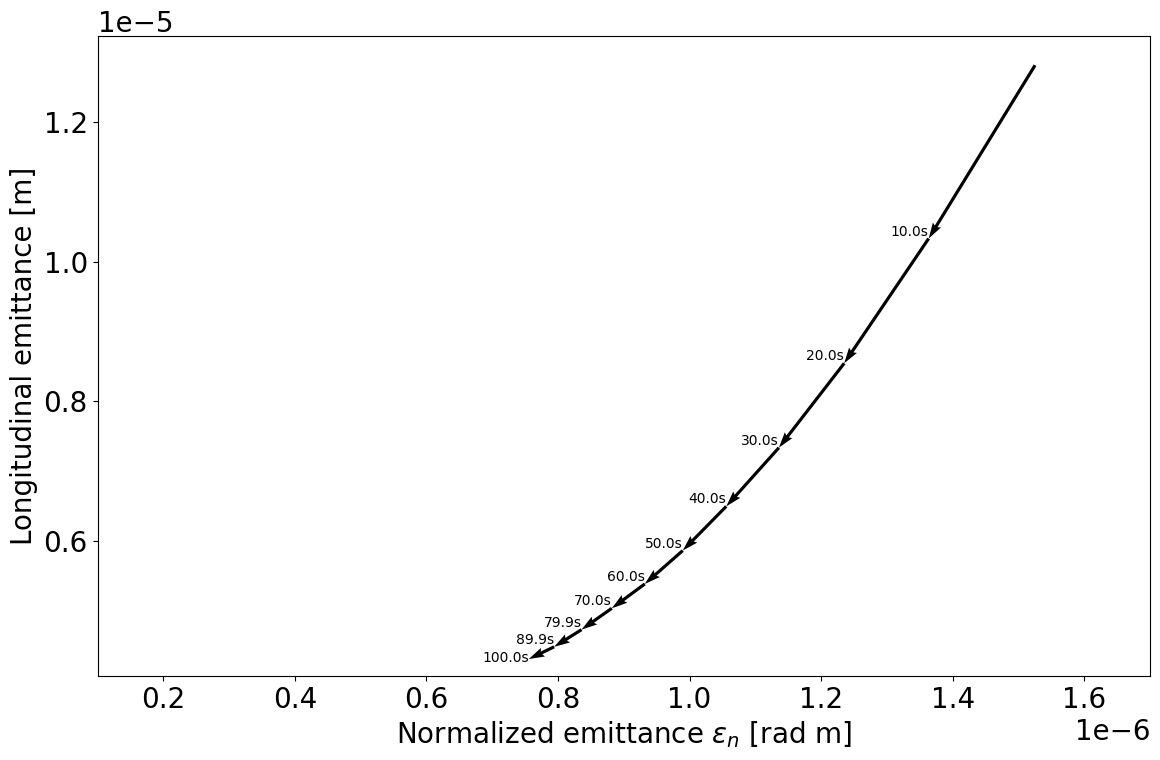

In [131]:
from tqdm import tqdm
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 20})

cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

for i, ion_loop in tqdm(enumerate([lead])):    
    data = np.load(f'../results/IBS_bunched/{ion_loop.name}.npz')
    linear_results = np.load(f'results/{ion_loop.name}.npz')

    delta = linear_results['delta']
    zeta = linear_results['zeta']

    # Calculate mean and standard deviation along the particle axis (axis=1)
    mean_z = np.mean(zeta, axis=1)
    mean_delta = np.mean(delta, axis=1)
    sigma_z = np.std(zeta, axis=1)
    sigma_delta = np.std(delta, axis=1)

    # Calculate the covariance between zeta and delta for each turn
    cov_z_delta = np.mean(zeta * delta, axis=1) - mean_z * mean_delta

    # Calculate longitudinal emittance for each turn
    longitudinal_emittance = np.sqrt(sigma_z**2 * sigma_delta**2 - cov_z_delta**2)

    emittance_x = linear_results['emittance_x']
    time = linear_results['time']
    rms_dp_p = np.std(delta, axis=1)

    index_closest_to_40 = np.argmin(np.abs(time - 40))

    emittance_x_values = emittance_x[:]
    rms_dp_p_values = rms_dp_p[:]
    
    # Plot the contour
    growth_rates_2d_x = data['growth_rates_2d_x']
    growth_rates_2d_y = data['growth_rates_2d_y']
    growth_rates_2d_z = 0.5*data['growth_rates_2d_z']
    sig_delta_list = data['sig_delta_list']
    n_emitt_list = data['n_emitt_list']
    total_intensity = data['total_intensity']
    
    loaded_data = np.load(f'../results/optimal_laser_x/{ion_loop.name}.npz')
    transverse_growth_rate_list = loaded_data['transverse_growth_rate_list']
    longitudinal_growth_rate_list=loaded_data['longitudinal_growth_rate_list']
    laser_x_list=loaded_data['laser_x_list']
   
    min_transverse_index = np.argmin(transverse_growth_rate_list)
    min_longitudinal_index = np.argmin(longitudinal_growth_rate_list)
    print(min_transverse_index)
    print(min_longitudinal_index)

    #69  #74=0
    laser_position_index = 74
    laser_offset = laser_x_list[laser_position_index]
    print('laser offset',laser_offset*1e3,'mm')
    threshold_longitudinal2 = -longitudinal_growth_rate_list[laser_position_index]  # Set the threshold value
    threshold_transverse2 = -(transverse_growth_rate_list[laser_position_index])  # Set the threshold value

    
    threshold_transverse = -min(transverse_growth_rate_list)  # Set the threshold value
    min_transverse_index = np.argmin(transverse_growth_rate_list)
    threshold_longitudinal = -longitudinal_growth_rate_list[min_transverse_index]  # Set the threshold value
    

    # plt.contour(n_emitt_list, sig_delta_list, growth_rates_2d_x, levels=[threshold_transverse, np.inf],
    #                 colors=cycle[0], linewidths=2)   

    # plt.contour(n_emitt_list, sig_delta_list, growth_rates_2d_z, levels=[threshold_longitudinal],
    #                 colors=cycle[0], linestyles='--', linewidths=2)
    


    # plt.contour(n_emitt_list, sig_delta_list, growth_rates_2d_x, levels=[threshold_transverse2, np.inf],
    #                 colors=cycle[2], linewidths=2)   

    # plt.contour(n_emitt_list, sig_delta_list, growth_rates_2d_z, levels=[threshold_longitudinal2],
    #                 colors=cycle[2], linestyles='--', linewidths=2)


    # Define the number of segments for each arrow
    num_segments = 10
    
    # Calculate the step size for each segment
    step_size = len(time) // num_segments
    
    # Plot each segment as a quiver plot
    for j in range(num_segments):
        # Calculate the indices for the start and end points of the segment
        start_idx = j * step_size
        end_idx = min((j + 1) * step_size, len(time) - 1)
        
        # Calculate the start and end points of the segment
        start_x = emittance_x_values[start_idx]
        end_x = emittance_x_values[end_idx]
        
        start_y = longitudinal_emittance[start_idx]
        end_y = longitudinal_emittance[end_idx]
        
        # Plot the quiver plot for the segment
        arrow = plt.quiver(start_x, start_y, end_x - start_x, end_y - start_y, scale=1,
                            scale_units='xy', angles='xy', color='black', width=0.003)
        
        # Add time annotation at the end of the arrow
        time_annotation_x = end_x
        time_annotation_y = end_y
        if j == num_segments - 1:  # for the last arrow
            time_annotation_text = "100.0s"
            time_annotation_y=0.98*time_annotation_y
        else:
            time_annotation_text = f"{time[end_idx]:.1f}s"
        plt.text(time_annotation_x, time_annotation_y, time_annotation_text, color='black', fontsize=10, ha='right', va='bottom')
  

# Plotting the arrows on top completes, now let's adjust other settings        
injection_nemitt = emittance_x[0]
injection_dp_p = rms_dp_p[0]

# plt.scatter(injection_nemitt, injection_dp_p, color='red', label='Initial condition')
# plt.text(0.97*injection_nemitt, 0.98*injection_dp_p, 'Initial condition', color='red', fontsize=20, ha='right')        

plt.xlim([n_emitt_list[0], n_emitt_list[-1]])
plt.xlabel('Normalized emittance $\\epsilon_n$ [rad m]', fontsize=20)
plt.ylabel('Longitudinal emittance [m]', fontsize=20)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# plt.legend(handles=[
#     Line2D([0], [0], linestyle='-', color=cycle[0],  label='Horizontal equilibrium '),
#     Line2D([0], [0], linestyle='--', color=cycle[0], label='Longitudinal equilibrium'),
          
# ], loc='lower right')


plt.tight_layout()
#plt.savefig('figures/Equilibrium_emittance.png', dpi=300)
plt.show()

In [127]:
linear_results.keys()

KeysView(NpzFile 'results/Pb$^{79+}$.npz' with keys: x, px, y, py, zeta...)